# Data Visualization and Analysis

                                                  Project Overview
                                                  
Included are 2 data sets that are representative of actual company data: 

    1) Demo Logger, a report that lists potential customers that received a product demo, and 

    2) Partner Transactions: a report that lists the subset of customers from #1 that decided to purchase the software after receiving the demo.

A few things to note:

 * The Company sells an implementation package to every account that goes live. It typically costs $495.
 
 * Beyond the implementation package, the pricing model is consumption based - customers process transactions on the platform and the Company receives a percentage of the transactions. There is no monthly fee or contract period. If you find it useful for this exercise, you can assume revenue is 2% of transactions.
 
 * The sales team sometimes finds it useful to segment customers by size based on transaction volume. For this exercise, the buckets are follows:  
     * <$100K = Small,
     
     * $100-299K = Medium,  
     
     * $300-599K = Large,
     
     * $600K+ = Whale. 
     

Assignment questions: Please respond to the prompts below. Feel free to share any backup as appropriate and if you find it useful to make assumptions in your analysis, please state them clearly.

    
    A)	What is the company demo to deal conversion rate? How does it differ by sport?
    
    B)	What is the company sales cycle between the demo and deal? How does it differ by size?
    
    C)	Which sales reps are the most productive? Which are the least productive?
    
    D)	What is one other KPI or SaaS metric that can be determined based on the data? How would you calculate it?
    
    E)	What are the most important 2-3 insights, recommendations, or actions the Company should consider based on the analysis in A-D above?
    
    F)	What is another data point or data set that you did not have but would have been useful when answering questions A-C above?


### Importing Libraries and Uploading & Cleaning Data 

A few notes before starting:

- Revenue was recorded as 2% of the transaction, as suggested in the prompt

- I wanted to try and use ggplot as much as possible in my illustrations (as I tend to prefer it for data visualization). I found that Python's ggplot still has a few bugs that need to be fished out, though, and so I decided to import R's ggplot2. Even still, I did use Seaborn/matplotlib when I found that it was easiest.

- Originally I wanted to do *everything* in Python so that the project was completely replicable. It got to the point where I was spending too much time cleaning data and not enough time making visuals, and so, because the dataset was relatively small, I choose to do some of the data cleaning in Excel as well
    
    - I've attached the revised datasets to the email in order to maintain replicability

In [167]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.library['ggplot']

import seaborn as sns
from ggplot import *

In [168]:
# In order to use R's ggplot2 in Python

import rpy2.interactive as r
%reload_ext rpy2.ipython
import rpy2.interactive.packages

In [169]:
demo1 = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/League Apps/assignment demo logger.csv')
partner2 = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/League Apps/assignment partner list.csv')

In [170]:
# Creating Indexes for both Dataframes
demo1['index'] = demo1.index
partner2['index'] = partner2.index

In [171]:
# Creating CONVERSION DUMMY for demo1

conv_dummy = []
for elem in demo1['partner_id']:
    if elem > 0:
        conv_dummy.append(1)
    else:
        conv_dummy.append(0)

conv_dummy = pd.DataFrame({'conv_dummy':conv_dummy})

demo1 = pd.concat([demo1, conv_dummy], axis = 1)

Here, we calculate buckets based on expected revenue (via transactions):

- 0 <= Small < 2000
    
- 2000 <= Medium < 6000
    
- 6000 <= Large < 12000
    
- 12000 <= Whale

In [172]:
# Creating "bucket" classes
demo1['bucket_class'] = 'Whale'
def classifier(x):
    if 0 <= x < 100000*0.02:
        return 'Small'
    elif 100000*0.02 <= x < 300000*0.02:
        return 'Medium'
    elif 300000*0.02 <= x < 600000*0.02:
        return 'Large'
    return 'Whale'

demo1['bucket_class'] = demo1['est_annual_revenue'].apply(classifier)

demo1.head()

,demo_date,sport,sales_rep,est_annual_revenue,partner_id,index,conv_dummy,bucket_class
0,2017-01-09,Softball,Dale,1800.0,2866.0,0,1,Small
1,2017-01-06,Multi-Sport,Kline,4000.0,3880.0,1,1,Medium
2,2017-03-21,Softball,Kline,700.0,10454.0,2,1,Small
3,2017-01-12,Lacrosse,Rolanda,8000.0,10856.0,3,1,Large
4,2017-03-22,Other,Kline,1000.0,11094.0,4,1,Small


In [173]:
partner2.head()

,partner_id,deal_date,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,index
0,2866,2017-05-26,0.0,0.00,0.00,0.00,0.00,55.84,96.26,277.46,14.08,0.00,0.0,54.08,486.10,121.66,27.24,3.52,0.00,0
1,3880,2018-04-13,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,47.28,1
2,10454,2016-12-13,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2
3,10856,2014-10-16,35.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3
4,11094,2017-04-01,79.7,45.68,219.86,59.52,83.96,24.62,114.76,149.76,115.46,1.76,33.0,56.98,44.66,31.92,198.90,41.56,79.10,4


## Part A)	What is the company demo to deal conversion rate? How does it differ by sport?

In [174]:
conv_rate = 1 - (demo1['partner_id'].isnull().sum()/len(demo1['partner_id']))
conv_rate

0.31645569620253167

As we can see above, the average conversion rate is 31.65%. That is, we convert, on average, about three times for every ten attempts. To answer our question regarding conversion by sport, we look on below:

In [175]:
# Grouping by sport 

convrate_bysport = demo1[['sport','conv_dummy']].groupby('sport', as_index = False).mean()
convrate_bysport.columns = ['Sport','Rate of Conversion']
convrate_bysport = convrate_bysport.sort_values(by='Sport')
convrate_bysport

,Sport,Rate of Conversion
0,Baseball,0.222222
1,Basketball,0.405063
2,Lacrosse,0.358209
3,Multi-Sport,0.348837
4,Other,0.500000
5,Soccer,0.300000
6,Softball,0.144928
7,Volleyball,0.500000


We can see above as well as below that both Volleyball and 'Other' sports convert most frequently.

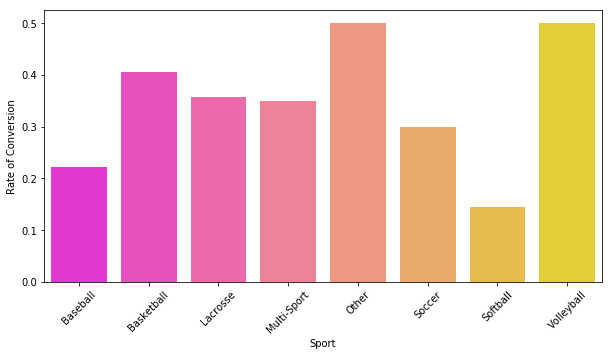

In [176]:
a = sns.barplot(convrate_bysport['Sport'], convrate_bysport['Rate of Conversion'], palette = 'spring')
a.set_xticklabels(a.get_xticklabels(), rotation=45)
a

If we dig a bit deeper, though, it becomes obvious that neither Volleyball nor 'Other' accounts are all that commonplace (the least commonplace, as it happens).

In [177]:
conv_bysport = pd.merge(demo1[['sport','conv_dummy']].groupby('sport', as_index = False).sum(), demo1[['sport','index']].groupby('sport', as_index = False).count(), how = 'inner', on = 'sport')
conv_bysport.columns = ['Sport', 'Total Converted', 'Total Count']
conv_bysport = conv_bysport.sort_values('Sport')
conv_bysport

,Sport,Total Converted,Total Count
0,Baseball,24,108
1,Basketball,64,158
2,Lacrosse,24,67
3,Multi-Sport,15,43
4,Other,13,26
5,Soccer,24,80
6,Softball,10,69
7,Volleyball,1,2


/Users/MattMecca/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


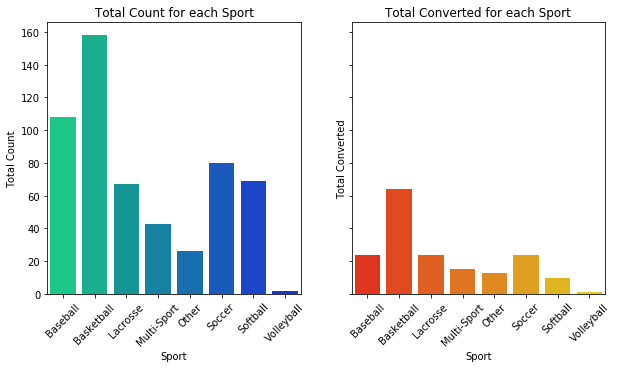

In [178]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True)

a = sns.barplot(x = 'Sport', y = 'Total Count', data = conv_bysport, palette = 'winter_r', ci = None, ax = ax0)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
a.set_title("Total Count for each Sport")

b = sns.barplot(x = 'Sport', y = 'Total Converted', data = conv_bysport, palette = 'autumn', ci = None, ax = ax1)
b.set(xlabel='Sport', ylabel='Total Converted')
b.set_xticklabels(b.get_xticklabels(), rotation=45)
b.set_title("Total Converted for each Sport")

fig.show()

Given that Volleyball and 'Other' are our smallest samples (we've made the fewest attempts at converting these types of leagues), this should give us pause when considering whether or not we ought to target those sports. We won't know whether they truly have a greater conversion rate until we obtain a larger sample size naturally over time. If we wanted to go to the proverbial "well" here, basketball would be our best bet.

## B)	What is the company sales cycle between the demo and deal? How does it differ by size?

Sales cycles can be determined by a multitude of factors: the league's sport, the expected "bucket class" (derived from the league's estimated annual transaction figure), and, perhaps most important to us, what salesperson is working the deal. Below, we calculate the difference between the demo and the deal dates. We'll measure by days here.

In [179]:
# Calculating the difference between the demo and deal dates

demo1 = demo1.sort_values('partner_id')
partner2 = partner2.sort_values('partner_id')

demo_date = demo1.dropna()
demo_date = demo_date['demo_date']
demo_date = pd.DataFrame({'demo_date':demo_date})

partner2 = pd.concat([partner2, demo_date], axis = 1)
partner2['demo_date1'] = pd.to_datetime(partner2['demo_date'])
partner2['deal_date1'] = pd.to_datetime(partner2['deal_date'])

del partner2['demo_date']
del partner2['deal_date']

date_diff = partner2['deal_date1'].sub(partner2['demo_date1'], axis=0)
date_diff = pd.DataFrame({'date_diff':date_diff})
date_diff.head()

,date_diff
0,137 days
1,462 days
2,-98 days
3,-819 days
4,10 days


Some deal dates were inputed well before their respective demo date. We're going to assume data entry error here, and thus ignore all date differences that show as negative. We're also going to add which "bucket class" each deal goes into based on Estimated Transaction Volume adjusted (multiplied by 0.02) to represent Estimated Annual Revenue.

In [180]:
# Adding buckets to partner2 dataset and dropping negative values

buckets = demo1.dropna()
buckets = buckets[['sport','sales_rep','est_annual_revenue', 'bucket_class']]
partner2 = pd.concat([partner2, buckets], axis = 1)
partner2 = pd.concat([partner2, date_diff], axis = 1)
partner2 = partner2[partner2.date_diff > '0'] # Making sure we only have positive values

In [181]:
# Converting 'date_diff' time variable to 'date_diff_num' *numeric* variable for computational reasons

partner2['date_diff_num'] = (partner2['date_diff'] / np.timedelta64(1, 'D')).astype(int)

### Looking at the Median, *not* the Mean 

In order to try and circumvent anomalies that might skew our analysis, we'll look at the median, rather than the mean, of each group. We do this to try and eliminate some bias introduced by outliers.

In [21]:
# Grouping by sport first
datediff_bysport = partner2[['sport','date_diff_num']].groupby('sport').median()
datediff_bysport.columns = ['Median # of Days between Demo & Deal']
datediff_bysport.sort_values(by=['Median # of Days between Demo & Deal'], ascending = True)

,Median # of Days between Demo & Deal
sport,
Volleyball,8.0
Other,10.0
Baseball,11.0
Soccer,13.5
Basketball,14.0
Multi-Sport,30.0
Lacrosse,39.0
Softball,99.0


We know from before that there are few deals made with Volleyball and 'Other' organizations, and so we ought to take their numbers with a grain of salt. We should note, though, that with Basketball, our top converter, it only takes around 14 days between demo and deal.

In [22]:
# Now by sales representative
datediff_bysalesrep = pd.concat([partner2[['sales_rep','date_diff_num']].groupby('sales_rep').median(), partner2[['sales_rep','date_diff_num']].groupby('sales_rep').count()], axis = 1) 
datediff_bysalesrep.columns = ['Median # of Days between Demo & Deal', 'Number of Deals Made']
datediff_bysalesrep.sort_values(by=['Number of Deals Made'], ascending = False)

,Median # of Days between Demo & Deal,Number of Deals Made
sales_rep,,
Kline,14.0,35
Dale,19.5,22
Mick,12.0,21
Bill,14.0,12
Alexa,17.5,10
Scott,39.5,8
Cory,15.0,7
Neal,70.0,7
Amy,33.0,6


We see that, while Ben had the the smallest median number of days between demo and deal, he made a single sale. This is in contrast to Kline, who, while normally taking more than twice as long to get a deal done, led the team with 35 sales, almost twice as much as the next best sales rep.

Looking at our box plot below, we see that Cory and Neal seem to be the most consistent. For Neal, he almost always closes deals within 10 to 200 days. Cory's deals, on the other hand, seem to come to always come together fairly quickly, never broaching more than 70 days or so. Their fairly predictive influence on the sales cycle can, at least partly, be attributed to them making few total deals (seven a piece).

/Users/MattMecca/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:61: UserWarning: Error while trying to convert the column "date_diff". Fall back to string conversion. The error is: Unknown numpy array type 'timedelta64[ns]'.
  (name, str(e)))


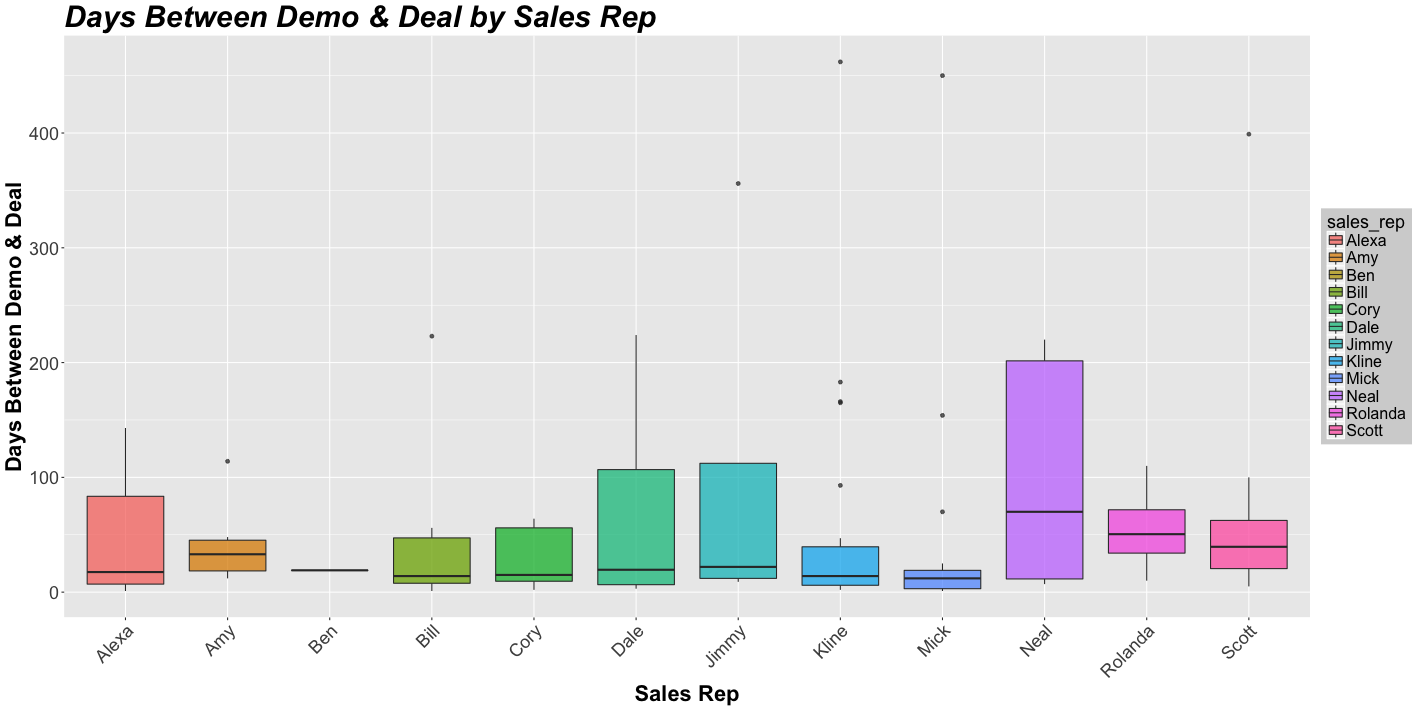

In [104]:
%%R -w 50 -h 25 -u cm -i partner2 

library(ggplot2)

ggplot(aes(x = sales_rep , y = date_diff_num, fill = sales_rep), data = partner2) +
    geom_boxplot(alpha = 0.75) +
    labs(title = "Days Between Demo & Deal by Sales Rep", x = "Sales Rep", y = "Days Between Demo & Deal") +
    theme_gray() +
    theme(axis.text.x = element_text(angle = 45, size = 18, hjust = 1), 
        axis.text.y = element_text(size = 18, hjust = 1),
        axis.title.x = element_text(color="black", size=22, face="bold"),
        axis.title.y = element_text(color="black", size=22, face="bold"),
        legend.title = element_text(size=18),
        legend.text = element_text(size=16),
        legend.background = element_rect(fill="lightgrey"),
        plot.title = element_text(color="black", size = 30, face="bold.italic"))

*Note*: each box is drawn to contain 75% of deals made by the respective salesperson. The top of each box represents the 75th percentile, the bottom of each box represents the 25th percentile, and the black line in each box represents the median. The black dots above and below can be perceived as statistical outliers.

### Looking at the Mean 

Finally, we look at how bucket class may affect the average number of days between a firm seeing the demo and getting a deal done. Surprisingly, "Large" deals close quickest. Perhaps unsurprisingly, "Whales" take longest to materialize. 

We also see that "Whales" and "Large" deals aren't many in number.

In [183]:
partner2['bucket_class_num'] = partner2['bucket_class']
partner2['bucket_class_num'] = partner2['bucket_class_num'].map({'Small': 1, 'Medium': 2, 'Large': 3, 'Whale': 4})

datediff_byclass = pd.concat([partner2[['bucket_class','date_diff_num']].groupby('bucket_class').median(), partner2[['bucket_class','date_diff_num']].groupby('bucket_class').count()], axis = 1) 
datediff_byclass.columns = ['Median # of Days between Demo & Deal', 'Number of Deals Made']
datediff_byclass.sort_values(by=['Median # of Days between Demo & Deal'], ascending = True)

,Median # of Days between Demo & Deal,Number of Deals Made
bucket_class,,
Large,11.5,14
Small,15.5,66
Medium,16.0,39
Whale,35.5,18


For functional reasons (and by that, I mean because I can't get ggplot's x-axis variable ordered manually), I've set Small = 1, Medium = 2, Large = 3, and Whale = 4. The results are as follows: 

/Users/MattMecca/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:61: UserWarning: Error while trying to convert the column "date_diff". Fall back to string conversion. The error is: Unknown numpy array type 'timedelta64[ns]'.
  (name, str(e)))


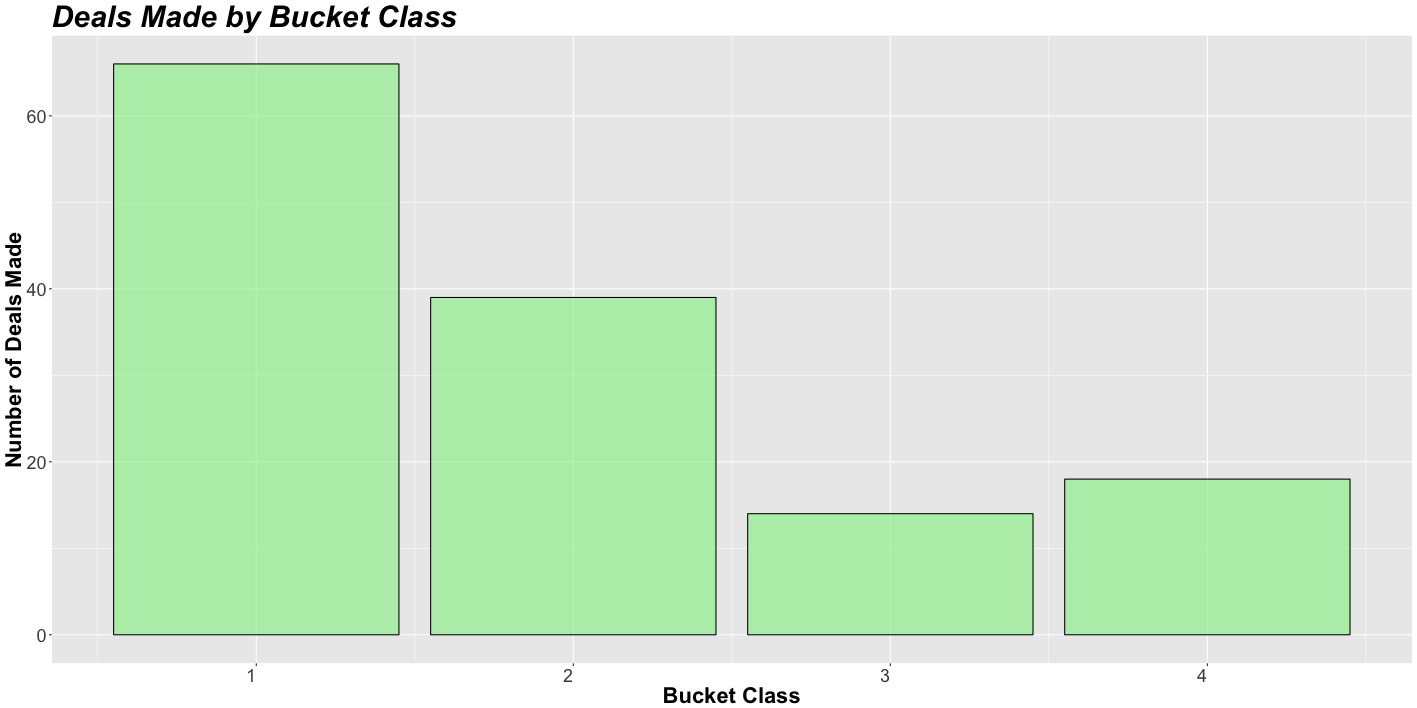

In [184]:
%%R -w 50 -h 25 -u cm -i partner2 

library(ggplot2)

ggplot(aes(x = bucket_class_num), data = partner2) +
    geom_bar(alpha = 0.6, color = 'black', fill = 'light green') +
    labs(title = "Deals Made by Bucket Class", x = "Bucket Class", y = "Number of Deals Made") +
    theme_gray() +
    theme(axis.text.x = element_text(size = 18, hjust = 1), 
        axis.text.y = element_text(size = 18, hjust = 1),
        axis.title.x = element_text(color="black", size=22, face="bold"),
        axis.title.y = element_text(color="black", size=22, face="bold"),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 16),
        legend.background = element_rect(fill = "lightgrey"),
        plot.title = element_text(color="black", size = 30, face="bold.italic"))

This outcome is as we might expect. Even the fact that "Whales" were more common than "Large" deals doesn't come as a *complete* surprise. It makes sense for the sales reps to target Whales when choosing which companies to contract. "Small" and "Medium" sized deals being most numerous can be chalked up to those leagues being most commonplace to the market.

## C)	Which sales reps are the most productive? Which are the least productive?

We've already seen how specific sales representatives may affect the average sales cycle. Now we're going to see what kind of bucket class each sales rep targeted and that meant for what kind of revenue they generated.

/Users/MattMecca/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:61: UserWarning: Error while trying to convert the column "date_diff". Fall back to string conversion. The error is: Unknown numpy array type 'timedelta64[ns]'.
  (name, str(e)))


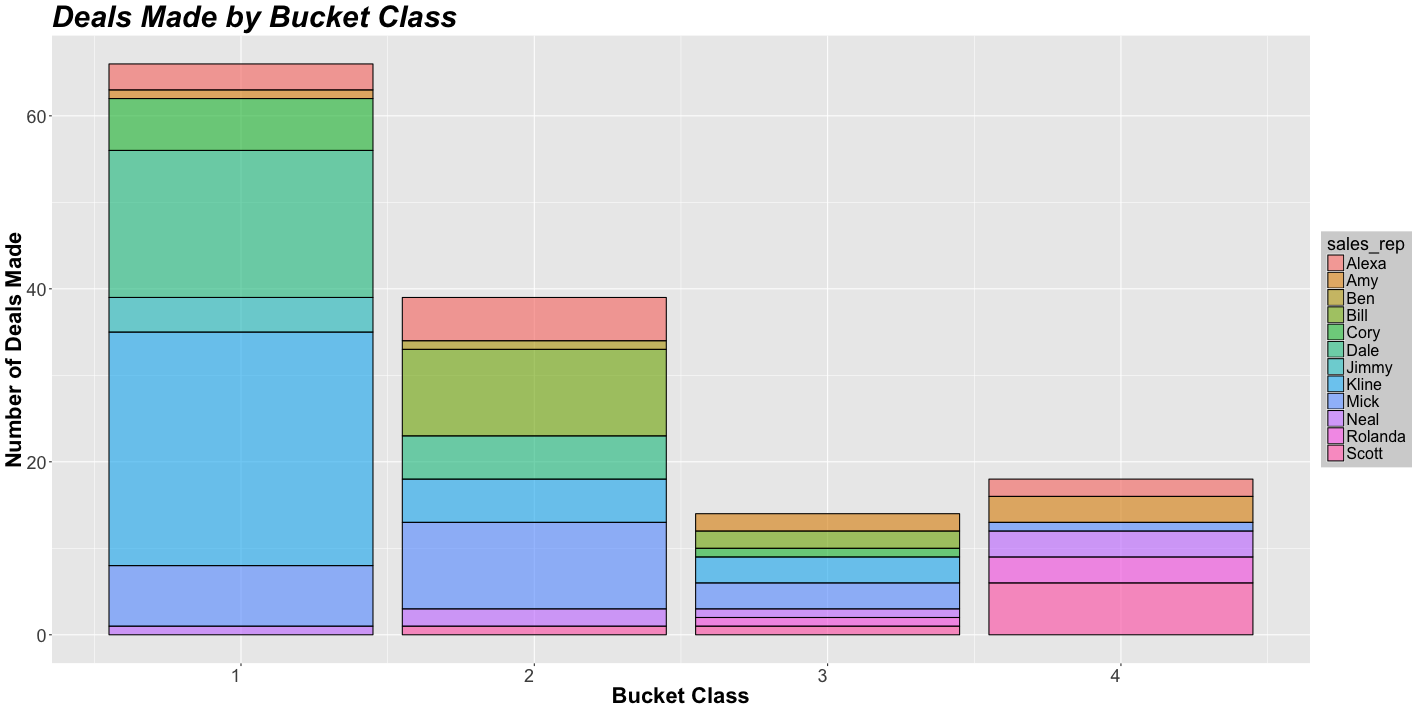

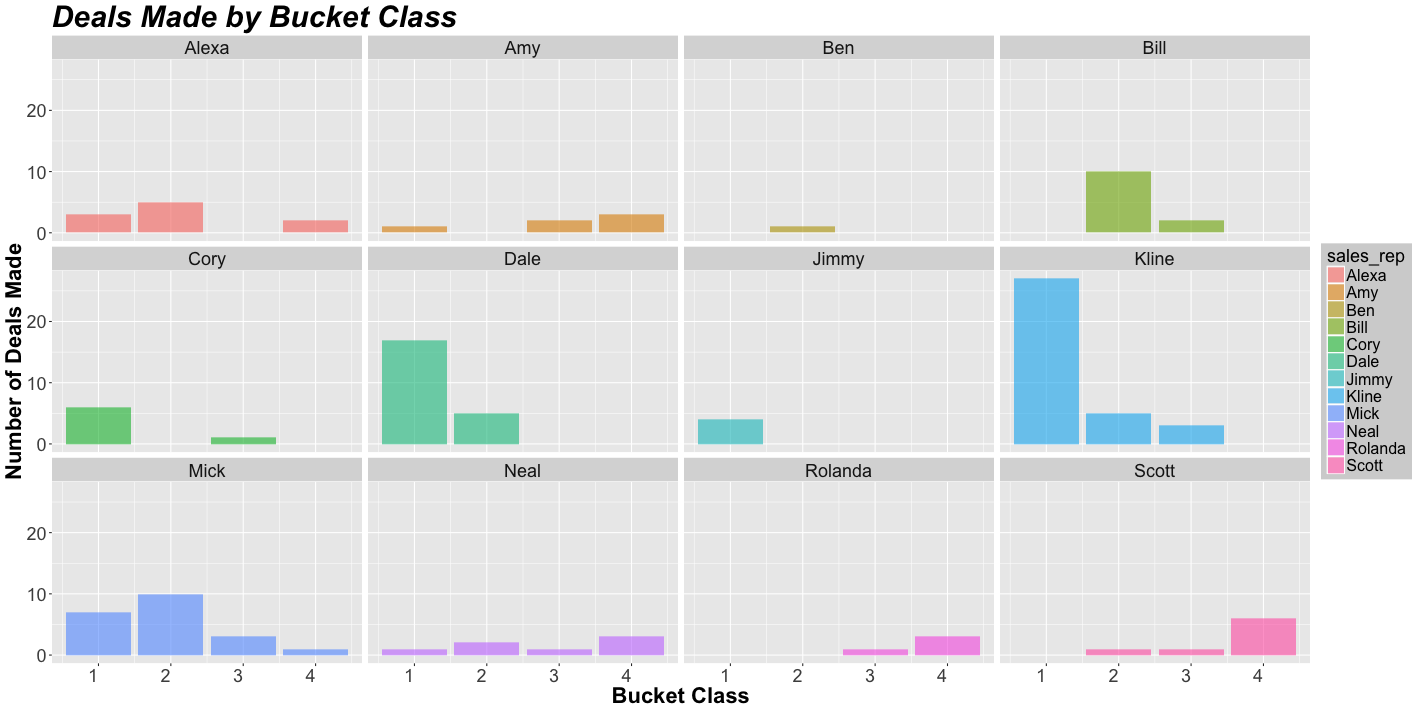

In [185]:
%%R -w 50 -h 25 -u cm -i partner2 

library(ggplot2)

e = ggplot(aes(x = bucket_class_num, fill = sales_rep), data = partner2) +
    geom_bar(alpha = 0.6, color = 'black') +
    labs(title = "Deals Made by Bucket Class", x = "Bucket Class", y = "Number of Deals Made") +
    theme_gray() +
    theme(axis.text.x = element_text(size = 18, hjust = 1), 
        axis.text.y = element_text(size = 18, hjust = 1),
        axis.title.x = element_text(color="black", size=22, face="bold"),
        axis.title.y = element_text(color="black", size=22, face="bold"),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 16),
        legend.background = element_rect(fill = "lightgrey"),
        plot.title = element_text(color="black", size = 30, face="bold.italic"))

f = ggplot(aes(x = bucket_class_num, fill = sales_rep), data = partner2) +
    geom_bar(alpha = 0.6) +
    labs(title = "Deals Made by Bucket Class", x = "Bucket Class", y = "Number of Deals Made") +
    theme_gray() +
    theme(axis.text.x = element_text(size = 18, hjust = 1), 
        axis.text.y = element_text(size = 18, hjust = 1),
        axis.title.x = element_text(color="black", size=22, face="bold"),
        axis.title.y = element_text(color="black", size=22, face="bold"),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 16),
        legend.background = element_rect(fill = "lightgrey"),
        plot.title = element_text(color="black", size = 30, face = "bold.italic"),
        strip.text.x = element_text(size = 18)) +
        facet_wrap('sales_rep')

plot(e)
plot(f)

*Note*: again, Small = 1, Medium = 2, Large = 3, and Whale = 4.

It's obvious here that Kline doesn't concern himself with expected bucket classes. Neal's sample size is far smaller, but he doesn't seem to be partial to any one class either. Sure, he doesn't focus on "Small" leagues as much as Kline, but he isn't as lopsided as Rolanda or Scott. What we'll see below is that Neal and Kline have, respectively, generated the most revenue for the company. And, at the end of the day, that really is what matters most.

In [26]:
# Summing up revenues for each sales rep
partner2['rev_sum'] = partner2.iloc[:,1:19].sum(axis=1)

For the below table, 'Initial Revenue Generated' is whatever revenue the Sales Rep generated when implementating the package; 'Yearly Revenue Generated' is whatever transactional revenues their deals have generated over the twelve months; and 'Total Revenue Generated' is simply an aggregation of the two.

In [152]:
init_rev = pd.merge(partner2[['sales_rep','date_diff_num']].groupby('sales_rep', as_index = False).count(), partner2[['sales_rep','rev_sum']].groupby('sales_rep', as_index = False).sum(), how = 'inner', on = 'sales_rep')
init_rev.loc[:,'date_diff_num'] *= 495
init_rev.columns = ['Sales Rep','Initial Revenue Generated', 'Yearly Revenue Generated']

rev_sum = partner2[['sales_rep','rev_sum']].groupby('sales_rep', as_index = False).sum()
rev_sum.rev_sum += init_rev['Initial Revenue Generated']
rev_sum.columns = ['Sales Rep', 'Total Revenue Generated']
rev_sum = pd.merge(init_rev, rev_sum, how = 'inner', on = 'Sales Rep')
rev_sum

,Sales Rep,Initial Revenue Generated,Yearly Revenue Generated,Total Revenue Generated
0,Alexa,4950,8527.12,13477.12
1,Amy,2970,2601.34,5571.34
2,Ben,495,128.00,623.00
3,Bill,5940,27381.52,33321.52
4,Cory,3465,15491.48,18956.48
5,Dale,10890,22689.28,33579.28
6,Jimmy,1980,1521.02,3501.02
7,Kline,17325,37663.86,54988.86
8,Mick,10395,26095.46,36490.46
9,Neal,3465,55681.58,59146.58


Above, we can see how much revenue each sales rep has generated over the last year and a half or so. And below we can see how large a piece that employee contributed to the overall pie. As mentioned before, Neal and Kline were the company's key contributors.

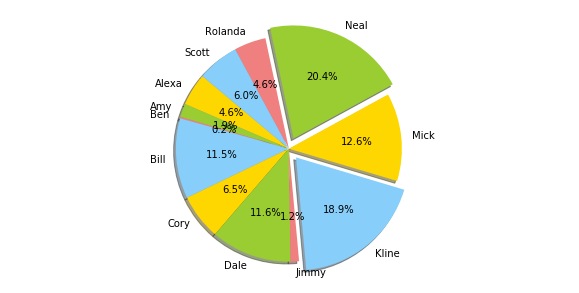

In [151]:
# Data to plot
labels = rev_sum['Sales Rep']
sizes = rev_sum['Total Revenue Generated']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0)  # explode 10th slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [29]:
transp_part2 = pd.concat([partner2.iloc[:,0:18], partner2.iloc[:, 22:23]], axis=1)
transp_part2 = transp_part2[['sales_rep', '1/31/17', '2/28/17', '3/31/17', '4/30/17', '5/31/17', '6/30/17', '7/31/17', '8/31/17', '9/30/17', '10/31/17', '11/30/17', '12/31/17', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18']]

transp_part2 = transp_part2.set_index('sales_rep').T
transp_part2 = transp_part2.groupby(transp_part2.columns, axis=1).sum()
transp_part2 = transp_part2.stack()

*Note*: I was unable to do what I wanted in Jupyter Notebook and so I chose to export my dataset to Excel, do some rearranging, and then reimport it. As I mentioned earlier, I've included the reformatted dataset in my email.


In [30]:
#transp_part2.to_csv('transp_part2.csv')
transp_part2 = pd.read_csv('/Users/MattMecca/Documents/Data Challenges/League Apps/transp_part2.csv')
transp_part2['date2'] = pd.to_datetime(transp_part2['date2'])

The graphs that I created below run a nonlinear "line of best fit" through each respective sales reps' data points, giving us an idea of how their transactional revenues have looked over the past year.

*Note*: while this is a statistical procedure, we've only used it here as a visual aid, and so the statistical parameters for each test are not included in our analysis.

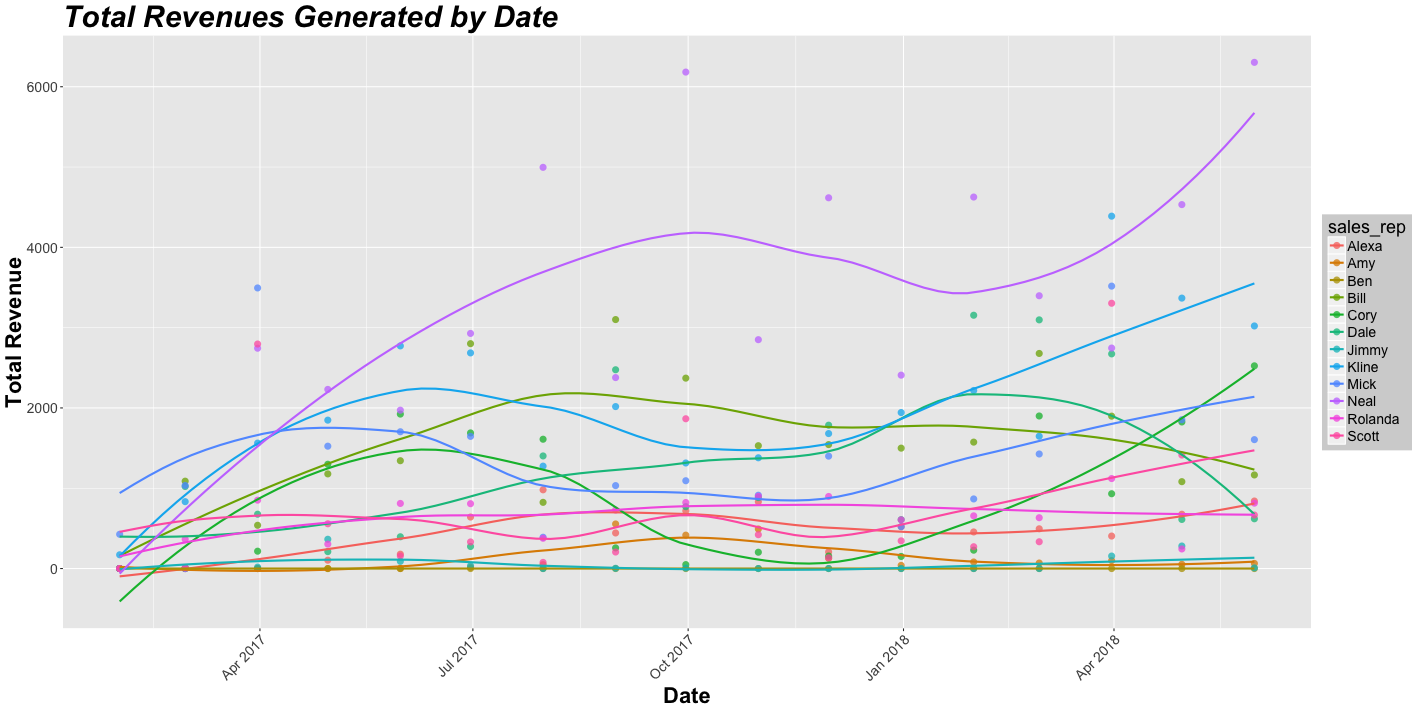

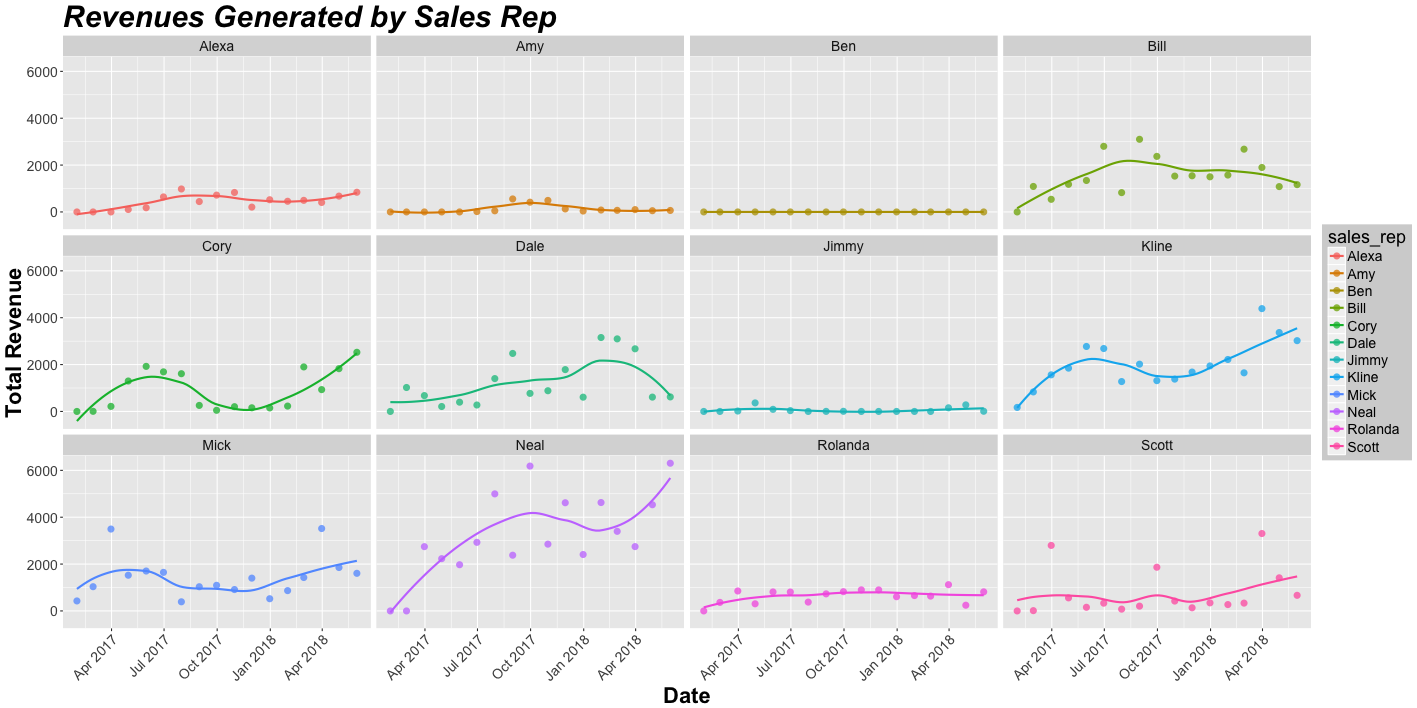

In [156]:
%%R -w 50 -h 25 -u cm -i transp_part2 

#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)


c = ggplot(transp_part2, aes(x=date2, y=revenue, color = sales_rep)) +
        geom_point(alpha = 0.75, shape = 16, size = 3) +
        geom_smooth(method=loess, se=FALSE, fullrange=TRUE) +
        labs(title = "Total Revenues Generated by Date", x = "Date", y = "Total Revenue") +
        theme(axis.text.x = element_text(angle = 45, size = 14, hjust = 1), 
              axis.text.y = element_text(size = 14, hjust = 1),
              axis.title.x = element_text(color="black", size=22, face="bold"),
              axis.title.y = element_text(color="black", size=22, face="bold"),
              legend.title = element_text(size=18),
              legend.text = element_text(size=14),
              legend.background = element_rect(fill="lightgrey"),
              plot.title = element_text(color="black", size = 30, face="bold.italic"))

d = ggplot(transp_part2, aes(x=date2, y=revenue, color = sales_rep)) +
        geom_point(alpha = 0.75, shape = 16, size = 3) +
        ggtitle("Revenues Generated by Sales Rep") +
        geom_smooth(method=loess, se=FALSE, fullrange=TRUE) +
        xlab("Date") +
        ylab("Total Revenue") +
        labs(fill = "Sales Rep") +
        theme(axis.text.x = element_text(angle = 45, size = 14, hjust = 1),
              axis.text.y = element_text(size = 14, hjust = 1),
              axis.title.x = element_text(color="black", size=22, face="bold"),
              axis.title.y = element_text(color="black", size=22, face="bold"),
              legend.title = element_text(size=18),
              legend.text = element_text(size=14),
              legend.background = element_rect(fill="lightgrey"),
              strip.text.x = element_text(size = 14),
              plot.title = element_text(color="black", size = 30, face="bold.italic")) +
        facet_wrap('sales_rep')

plot(c)
plot(d)

It has become obvious why Neal and Klines' deals account for so much of the Company's total revenue. Over the past twelve months (and especially over the last four) they have been seen the most upward trend in their revenue streams when compared to their peers. What's also of note here is transactional revenue's apparent seasonality. It seems to drop around Halloween before picking back up again after the New Year. Without data from multiple years and thus multiple seasons, though, it's tough to say whether or not this is typical.

## D) What is one other KPI or SaaS (Software as a service) metric that can be determined based on the data? How would you calculate it?

One of the things I feel ought to be prioritized is consistency. I mentioned it earlier in the context of the demo to deal numbers, but I think more important than that statistic is any type of statistic regarding revenue. And so another KPI that I think we should look into is the median to mean ratio of revenues generated over the past calendar year (i.e., from 05/30/17 to 05/30/18). 

This might be a good gauge of which employees bring on companies that routinely produce and which do not. The reason that I think this KPI could be important is because, ideally, you'd like to structure your revenue streams so that they're consistently producing. You don't want it so that companies pay a demo fee and then rarely, if ever, make a transaction. Even if the stream is a small one, there must be some value put on targeting companies that regularly produce versus companies that don't.

*Note*: I didn't have the right type of dataset to do it, but, to build on this idea, it might be good to develop a predictive model that would attempt to estimate the cash flows of a prospective league (similar to how we predict (or estimate) each league's transaction amounts).

In [60]:
# Deleting 2017s' January to April months and summing up remaining months
partner2kpi = partner2.iloc[:,1:]
del partner2kpi['1/31/17']
del partner2kpi['2/28/17']
del partner2kpi['3/31/17']
del partner2kpi['4/30/17']
partner2kpi['rev_sum'] = partner2kpi.iloc[:,1:14].sum(axis=1)

In [61]:
stats_bysalesrep = pd.concat([partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').sum(), partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').median(), partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').mean().round(), partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').median().round()/partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').mean().round(), partner2kpi[['sales_rep','rev_sum']].groupby('sales_rep').count()], axis = 1) 
stats_bysalesrep.columns = ['Revenues Generated', 'Median Revenue Figures', 'Mean Revenue Figures', 'Median to Mean Ratio', 'Number of Deals Made']
stats_bysalesrep.sort_values(by=['Revenues Generated'], ascending = False)

,Revenues Generated,Median Revenue Figures,Mean Revenue Figures,Median to Mean Ratio,Number of Deals Made
sales_rep,,,,,
Neal,48734.72,5470.90,6962.0,0.785837,7
Kline,30476.64,445.60,871.0,0.512055,35
Bill,23232.84,439.30,1936.0,0.226756,12
Dale,20384.54,426.89,927.0,0.460626,22
Mick,17912.94,349.74,853.0,0.410317,21
Cory,12047.72,219.54,1721.0,0.127833,7
Scott,9934.68,159.73,1242.0,0.128824,8
Rolanda,8920.36,1662.41,2230.0,0.745291,4
Alexa,8244.14,329.83,824.0,0.400485,10


As we've seen time and again, Neal leads the team in revenues generated. What's of note here, though, is that he doesn't seem to be the beneficiary of monster deals. We can see this by comparing Neal's Median Revenue Figure to his Mean Revenue Figure. His Mean to Median Ratio shows that he's consistent. By contrast, if we take a look at the same Figures for Scott, his Mean to Median Ratio is quite low –– 0.049493 –– yet the sum of Revenues he's Generated is relatively high. This implies that Scott is, unlike Neal, the beneficiary of some uncharacteristically large Whale. Because this sample size is so small, we can look into Scott's transactions directly.

In [154]:
transacs_scott = partner2kpi[['sales_rep', 'rev_sum', 'est_annual_revenue', 'bucket_class', 'sport']]
transacs_scott = transacs_scott[transacs_scott.sales_rep == 'Scott']
transacs_scott

,sales_rep,rev_sum,est_annual_revenue,bucket_class,sport
5,Scott,210.46,40000.00,Whale,Basketball
15,Scott,15.00,28000.00,Whale,Basketball
32,Scott,3678.12,22222.22,Whale,Basketball
66,Scott,66.00,5000.00,Medium,Lacrosse
88,Scott,5486.28,14000.00,Whale,Multi-Sport
101,Scott,101.00,40000.00,Whale,Basketball
109,Scott,109.00,20000.00,Whale,Basketball
151,Scott,268.82,6000.00,Large,Basketball


From the looks of it, Scott like to swing big. Three quarters of the deals that he's converted have been Whales. That helps explain the small Median to Mean Ratio, as a few of the accounts we once thought promising haven't done much in the past year. It also contributes to a larger question: are the estimated transaction volume values we've been assigning to prospective clients accurate?

And lastly, to try and add a little more clarity as to what I mean by the Median to Mean Ratio, I've included an illustration of the metric below. It shows the Median to Mean ratio, as well the median/mean revenue generated per deal. We see that Neal's median revenue is a bit higher than his mean revenue, but not by much. Ditto for Kline. For Scott, though, it looks as if his Median figure is nonexistent.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

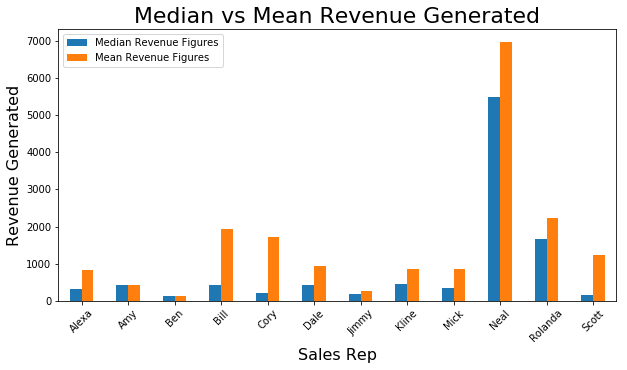

In [165]:
stacked_bar = stats_bysalesrep[['Median Revenue Figures', 'Mean Revenue Figures']]
stacked_bar.columns = ['Median Revenue Figures', 'Mean Revenue Figures']
stacked_bar.plot.bar(stacked=False)
plt.title('Median vs Mean Revenue Generated', fontsize=22)
plt.xlabel('Sales Rep', fontsize=16)
plt.ylabel('Revenue Generated', fontsize=16)
plt.xticks(rotation=45)

## E) What are the most important 2-3 insights, recommendations, or actions the Company should consider based on the analysis in A-D above?


I think the three most important insights we ought to take away from this report are as follows:

   1) We seem to be able to close deals with Basketball leagues relatively quickly. We also seem to be able to convert those deals at a relatively high rate. It might make sense to make doing business with those leagues a priority. 
    
   2) We ought to look at focusing on regular customers rather than leagues that, while potentially they might be a more lucrative client, they may also be less consistent. Without doing a more rigorous analysis, I have no way of saying the Median to Mean ratio is a valid representation of consistency, but perhaps there should be some reward for keeping your Median to Mean ratio (or some similar metric) within a certain interval. It seems that the more consistent revenue generators (Neal and Kline) had higher median to mean ratios, whereas the less consistent revenue generators (Scott) had lower median to mean ratios.  
    
   3) Going after Whales doesn't always pay. The two highest performers on the sales team were also the ones that had converted the "Small"-est deals. This may mean that Whales produce sporadically, or it may mean the system being used to estimate firms' transaction figures might be flawed. We could test the first case by calculating the standard deviation of revenue generated by league per bucket class (focusing on the Whale class) over time, and (one way) we can test the efficacy of the transaction estimation system by simply taking average revenue of each class and seeing if there's a statistical difference between the four. If wasn't for time and the questions had explicitly asked for it, I would have tried to run both tests. 

## F) What is another data point or data set that you did not have but would have been useful when answering questions A-C above?


Each employees time at the company –– being able to control for time at the company would've certainly helped us when judging each employee in section C). It also could have helped in answering part B). Employees initiating a deal, leaving the firm, and then the deal getting done months later under their name, for example, could obviously affect the average sales cycle. 

Having a larger sample size of data would have obviously been helpful in all three parts.